# Examen Módulo 2 - Simulación Montecarlo. <font color=blue>Tipo de examen 1</font>.
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar el examen:
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *E2_PrimerNombrePrimerApellidoApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E2_CristianZapata*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

# Primer punto. Evaluación numérica de integrales y áreas usando Montecarlo (50 puntos).

- En la clase de evaluación de integrales numéricas por montecarlo vimos dos tipos de evaluación de integrales.
- El tipo 1 se basaba en la definición de valor promedio de una función.
- El tipo 2 se basaba en probabilidades y una variable aleatoria de bernoulli (para encontrar áreas).

###  Parte A
**Enunciado** Considere las funciones $f_1(x)=\frac{x^3}{\sqrt{1+x^2}}$,  $f_2(x)=\sin(2x)\tan(8x)$, $f_3(x)=\sqrt{x^3}(1+\sin(x^7))$ y $f_4(x)=\log_{10}(2x)+8^x$.



**Punto A.1 (12 puntos)** Definir una función llamada  `montecarlo1` que corresponda al tipo 1 visto en clase para resolver integrales basada en la definición de valor promedio de una función.

**Solución**

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import sympy as sym

%matplotlib inline

In [26]:
def montecarlo1(f,a,b,N):
    xi = np.random.uniform(a,b,N) 
    return (b-a)*np.mean(f(xi))

**Punto A.2 (13 puntos)** Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo (1,6). Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

In [52]:
# Resolver
# 1. Definir las funciones que vamos a integrar

def f1(x):
    return (x**3)/(np.sqrt(1+x**2))

def f2(x):
    return (np.sin(2*x))*(np.tan(8*x))

def f3(x):
    return (np.sqrt(x**3))*(1+np.sin(x**7))

def f4(x):
    return np.log10(2*x) + 8**x

#Limites de integracion

a=1
b=6

#Cantidades de terminos

N = np.logspace(1,7,7).astype(int)

In [54]:
tabla_aproximaciones = pd.DataFrame(index=N,columns = ['f1','f2','f3','f4'])

tabla_aproximaciones.index.name = 'cantidad de terminos'


for n in N:
    tabla_aproximaciones.loc[n,'f1']=montecarlo1(f1,a,b,n)
    tabla_aproximaciones.loc[n,'f2']=montecarlo1(f2,a,b,n)
    tabla_aproximaciones.loc[n,'f3']=montecarlo1(f3,a,b,n)
    tabla_aproximaciones.loc[n,'f4']=montecarlo1(f4,a,b,n)




tabla_aproximaciones

,f1,f2,f3,f4
cantidad de terminos,,,,
10,84.6896,0.217138,39.9785,37953.2
100,73.5634,-2.53451,35.3558,120356
1000,70.2358,66.0674,33.1182,122886
10000,69.0967,1.73612,35.4663,125862
100000,69.4462,6.71737,35.0129,125828
1000000,69.3421,-36.3797,34.9693,125823
10000000,69.4163,2.05128,34.9527,126025


###  Parte B
**Enunciado** Considere la región definida por:
$$ \frac{(x-5)^2}{9} + \frac{(y+2)^2}{9} \leq 1 .$$

**Punto B.1 (5 puntos)** Definir una función llamada  `montecarlo2` que corresponda al tipo 2 visto en clase para encontrar áreas basada en probabilidades y una variable aleatoria de bernoulli.

**Solución**

In [19]:
def montecarlo2(region,a1,b1,a2,b2,N):
    
    AR = (b1-a1)*(b2-a2)
        
    x = np.random.uniform(a1,b1,N)
    y = np.random.uniform(a2,b2,N)
    
    b = region(x,y)
    
    area = AR*np.mean(b)
    
    
    return area

**Punto B.2 (10 puntos)** Graficar la región dada anteriormente y encontrar los límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$

**Solución**

In [20]:
N = 100
xnum = np.linspace(0,9,N)
ynum = np.linspace(-6,2.5,N)

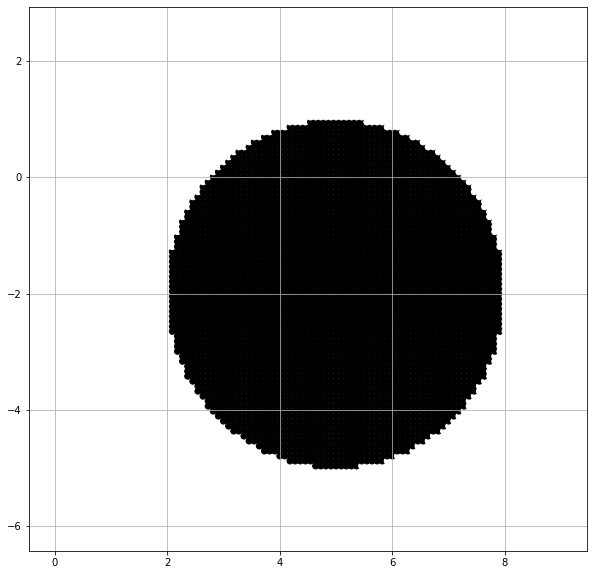

In [21]:
def region(x,y):
        return (((x-5)**2)/9)+(((y+2)**2)/9) < 1

X,Y = np.meshgrid(xnum,ynum)


plt.figure(figsize=(10,10))
plt.scatter(X,Y, c=~ region(X,Y),cmap = 'bone')
plt.grid()
plt.show()

**Punto B.3 (10 puntos)** Utilizar la función `montecarlo2` para realizar la evaluación numérica del área. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000, 100000, 1000000 y 10000000 términos) y cuyas columnas correspondan a las funciones.

**Solución**

In [30]:
a1 = 0
b1 = 9

a2=-6
b2=2.5


N = np.logspace(1,7,7).astype(int)

tabla = pd.DataFrame(index = N, columns = ['Area aproximada'])
tabla.index.name = 'cantidad de terminos'


for n in N:
    
    area = montecarlo2(region,a1,b1,a2,b2,n)
    tabla.loc[n,'Area aproximada'] = area
    

tabla

Area = 9*np.pi

#Creación de la tabla que mostrara los datos (con el error)

tabla2 = tabla

tabla2['error']=np.abs(Area-tabla2['Area aproximada'])

tabla2

,Area aproximada,error
cantidad de terminos,,
10,22.95,5.32433
100,31.365,3.09067
1000,29.835,1.56067
10000,28.7028,0.428466
100000,28.2155,0.0588389
1000000,28.2938,0.0194206
10000000,28.2644,0.00989418


# Segundo punto. Probabilidad Precio-Umbral (50 puntos).

**Enunciado**

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

**Punto 1 (10 puntos)** Descargar datos de los precios ajustados al cierre desde `yahoo finance` de los activos: Ford Motor Company y Tesla, Inc. en un DataFrame de `pandas` con ayuda del módulo `pandas-datareader`.

Considere como fecha de inicio el 1-Enero-2016 y fecha final el 31-Diciembre-2018.

Grafique los datos obtenidos en un mismo gráfico.

**Solución**

In [56]:
def adj_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

In [58]:
# Precios
names = ['TSLA','F']
start, end = '2016-01-01', '2018-12-31'
closes = adj_closes(names=names, start_date=start, end_date=end)

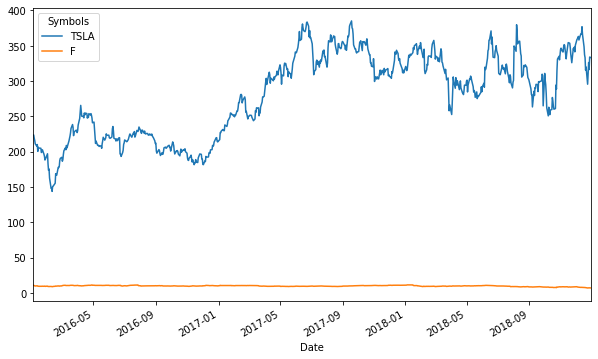

In [59]:
closes.plot(figsize=(10,6));

**Punto 2 (10 puntos)**. Calcule los rendimientos porcentuales diarios de los dos activos junto con sus características estadísticas (media y desviación estándar).

Grafique dichos rendimientos en un mismo gráfico.

**Solución**

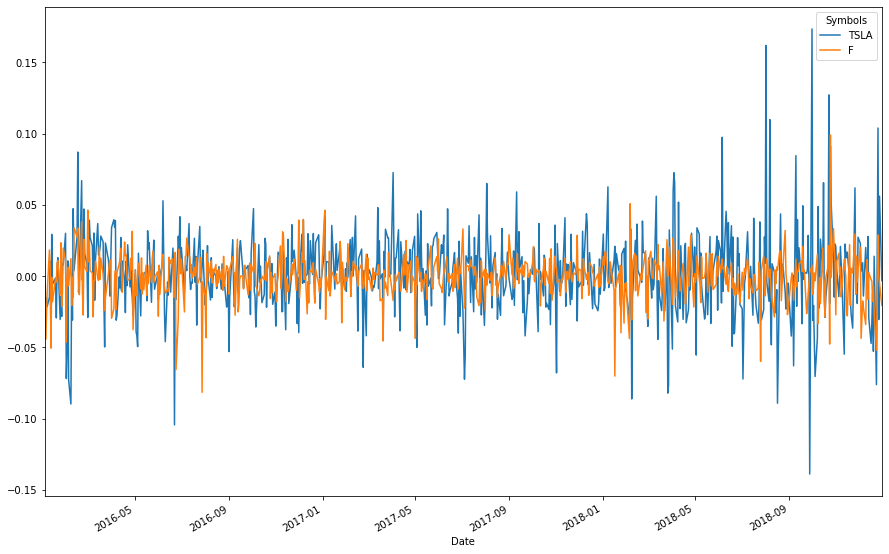

In [64]:
# Rendimientos porcentuales diarios
ret = closes.pct_change().dropna()
ret.plot(figsize=(15,10));

In [62]:
# Media y desviación estándar de cada activo
mu_TSLA, mu_F = ret.mean()["TSLA"], ret.mean()["F"]
mu_TSLA, mu_F

(0.0009312713579437676, -0.00047748459810049)

In [63]:
s_TSLA, s_F = ret.std()["TSLA"], ret.std()["F"]
s_TSLA, s_F

(0.02846736733356451, 0.015216849051562543)

**Punto 3 (10 puntos)** Simular 1000 escenarios de rendimientos diarios para el año 2019 (para cada una de las empresas). Con estos rendimientos simulados, encontrar los respectivos precios al cierre simulados usando la fórmula repectiva. Graficar dichos precios simulados **en una gráfica diferente para cada empresa**.

**Solución**

In [75]:
# Función que simula varios escenarios de rendimientos diarios
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

In [76]:
# Simulación de rendimientos para cada empresa
simret_TSLA = ret_sim(mu_TSLA, s_TSLA, 365, 1000, '2019-01-01')
simret_F = ret_sim(mu_F, s_F, 365, 1000, '2019-01-01')
#simret_MSTF

In [77]:
# Obtenemos los precios
simcloses_TSLA = closes.iloc[-1]['TSLA']*((1+simret_TSLA).cumprod())
simcloses_F = closes.iloc[-1]['F']*((1+simret_F).cumprod())

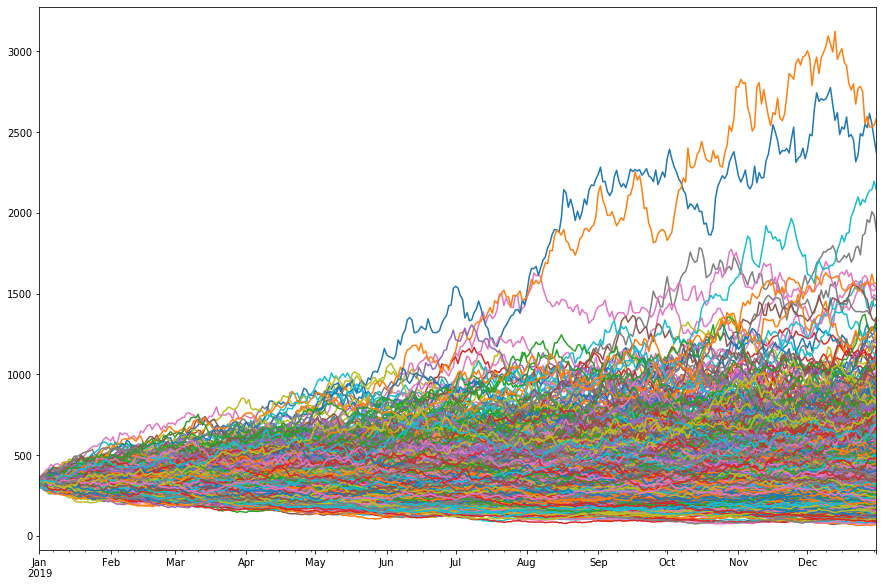

In [82]:
simcloses_TSLA.plot(figsize=(15,10),legend=False);

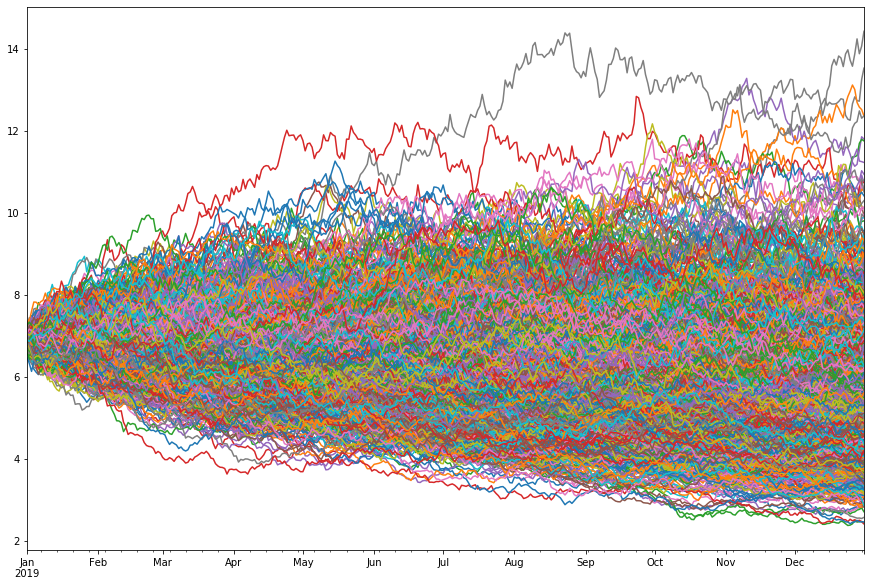

In [83]:
simcloses_F.plot(figsize=(15,10),legend=False);

**Punto 4 (10 puntos)** Calcular las probabilidades de que el último precio de la acción reportado aumente $10\%$.

**Solución**

7.624122285842896

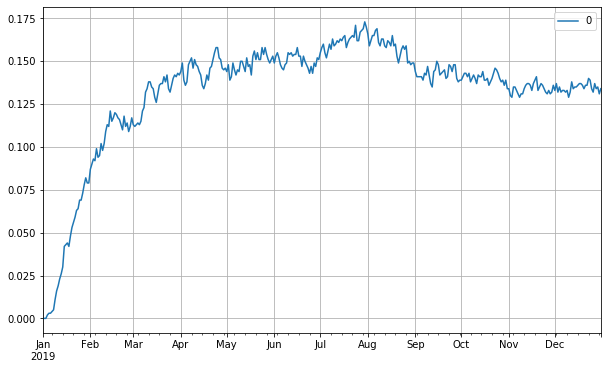

In [80]:
# Probabilidad de que el precio incremente un 10% en el siguiente año
K_F = closes.iloc[-1].F*1.1
prob = pd.DataFrame((simcloses_F>K_F).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

K_F

366.0799865722657

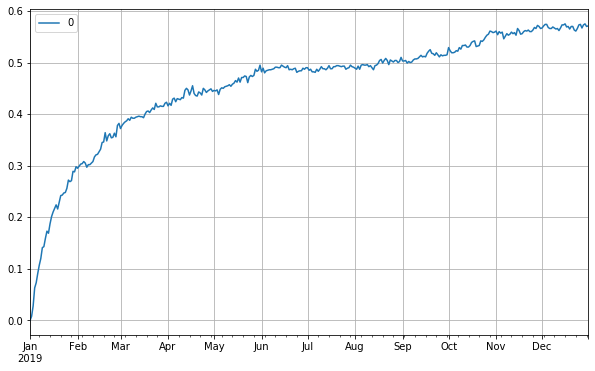

In [81]:
# Probabilidad de que el precio incremente un 10% en el siguiente año
K_TSLA = closes.iloc[-1].TSLA*1.1
prob = pd.DataFrame((simcloses_TSLA>K_TSLA).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

K_TSLA

**Punto 5(10 puntos)** Descargue los datos de cada activo (empresa) del año 2019 y haga un análisis minucioso y detallado de éstos valores reales respecto a los simulados y a las probabilidades obtenidas en el punto anterior.

El análisis debe realizarse para cada empresa y se debe evaluar y concluir que tan acertados fueron los resultados anteriores.

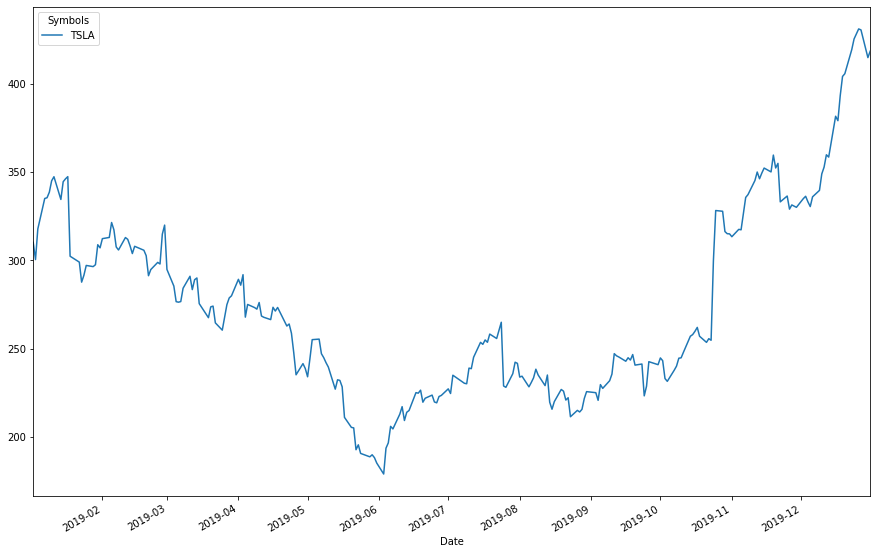

In [87]:
start, end = '2019-01-01', '2019-12-31'
name = ['TSLA']
closes2018 = adj_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(15,10));

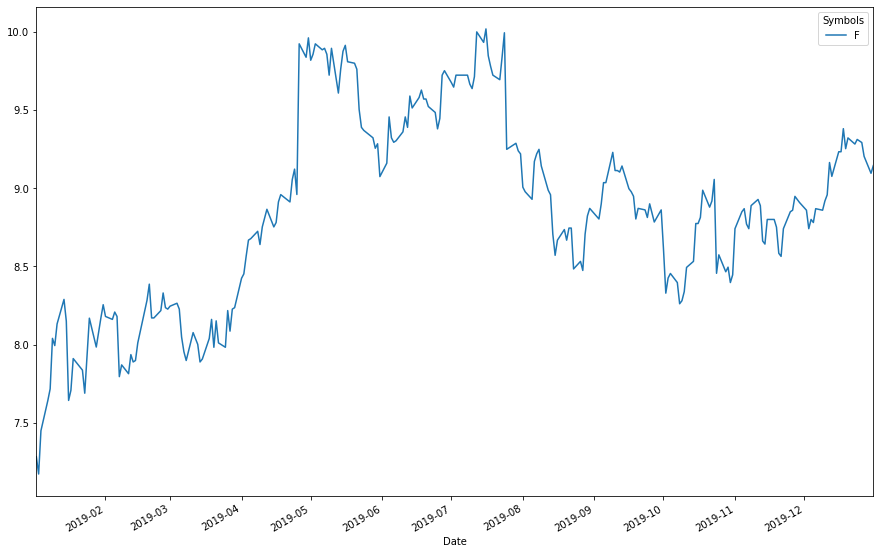

In [88]:
start, end = '2019-01-01', '2019-12-31'
name = ['F']
closes2018 = adj_closes(names=name, start_date=start, end_date=end)
closes2018.plot(figsize=(15,10));

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Cristian Camilo Zapata Zuluaga.
</footer>